In [1]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch


/home/j-j10a704/.conda/envs/sd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-14 17:12:21.793070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 17:12:21.793121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 17:12:21.794593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-14 17:12:21.802672: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow bin

In [3]:
base = StableDiffusionXLPipeline.from_single_file(
    "/home/j-j10a704/models/epoch2.safetensors", use_safetensors=True,
    torch_dtype=torch.float16
).to("cuda:8")

In [5]:
refiner = StableDiffusionXLImg2ImgPipeline.from_single_file(
    "/home/j-j10a704/models/refiner.safetensors",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda:8")

100%|██████████| 6/6 [00:01<00:00,  3.13it/s]


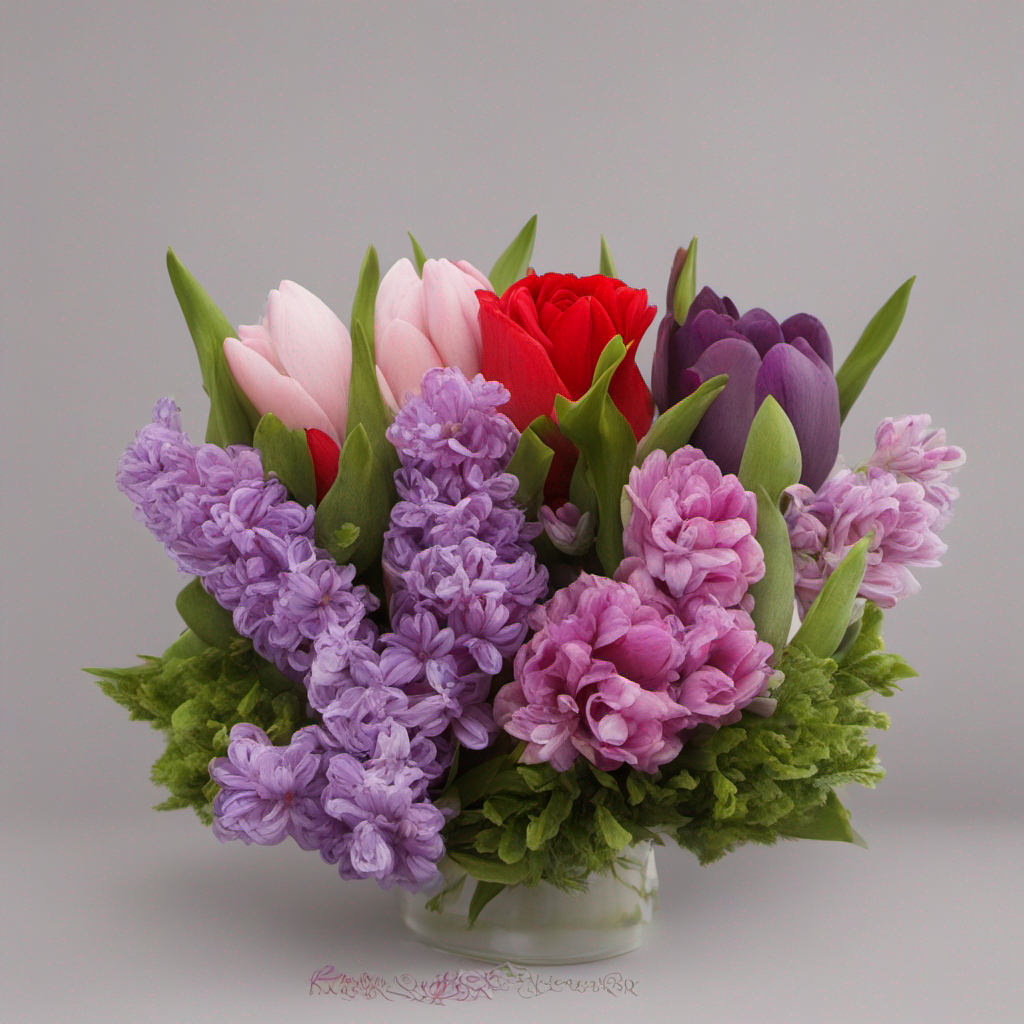

In [7]:
prompt = "hyacinth, red_rose, purple_tulip, product thumbnail, a bouquet, simple background, white background"

image = base(
    prompt=prompt,
    num_inference_steps=40,
    output_type="latent",
).images


image = refiner(
    prompt=prompt,
    num_inference_steps=20,
    image=image,
).images[0]

image